## 1. 라이브러리 불러오기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
%matplotlib inline

## 2. 데이터 불러오기 

In [3]:
# 데이터 : 2019 02 03 04 05 / 2020 02 03 04 05
df = pd.read_csv('./CARD_SPENDING_RESIDENT.txt',sep='\t',engine='python',encoding="cp949")
df.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [4]:
df.shape

(2537753, 8)

In [5]:
df_sample = df.sample(1000,random_state=1)
df_sample.shape

(1000, 8)

In [1]:
# 어느 동에서 어떤 소비를 많이 했는지
# 시기적으로 어떤 것들을 많이 소비했는데
# 어떤 성별에서 주로 어떤것을 얼만큼 많이 소비했는지

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   STD_DD      int64 
 1   GU_CD       int64 
 2   DONG_CD     int64 
 3   MCT_CAT_CD  int64 
 4   SEX_CD      object
 5   AGE_CD      int64 
 6   USE_CNT     int64 
 7   USE_AMT     int64 
dtypes: int64(7), object(1)
memory usage: 154.9+ MB


## 01. { 시기적으로 보았을 때 어떤 것을 많이 소비했는지 }

In [8]:
df_std01 = df[df['STD_DD'].astype(str).str.startswith('201902')]
df_std01

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
296413,20190228,350,720,80,M,50,27,669
296414,20190228,350,720,80,M,55,23,218
296415,20190228,350,720,80,M,60,5,27
296416,20190228,350,720,80,M,65,18,423


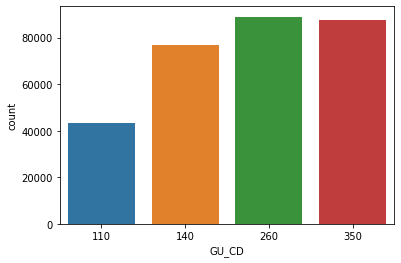

In [9]:
# 110 : 대구 중구 / 140 : 서울 중구 / 260 : 대구 수성구 / 350 : 서울 노원구
sns.countplot(data=df_std01,x='GU_CD')
# 중구에서 카드 사용률이 확실히 낮다 -> 중심지에서 사용되는 카드 사용률이 낮다

In [10]:
df_std01['MCT_CAT_CD'].nunique() # 총 23개 업종

23

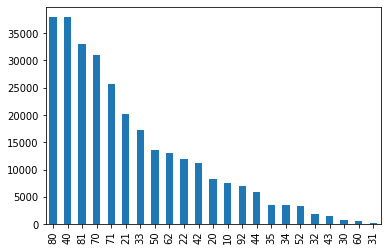

In [11]:
df_std01['MCT_CAT_CD'].value_counts().plot.bar()
# 80 요식업소가 많고 40 유통업 81 음료식품 70 71 : 보건위생 / 의료기관

In [12]:
df_std01_mct = df_std01[df_std01['MCT_CAT_CD'].astype(str).str.contains("80|40|81|70|71")]
df_std01_mct

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
37,20190201,110,517,40,F,20,130,828
38,20190201,110,517,40,F,25,233,1626
39,20190201,110,517,40,F,30,92,452
40,20190201,110,517,40,F,35,87,870
41,20190201,110,517,40,F,40,87,590
...,...,...,...,...,...,...,...,...
296412,20190228,350,720,80,M,45,27,452
296413,20190228,350,720,80,M,50,27,669
296414,20190228,350,720,80,M,55,23,218
296415,20190228,350,720,80,M,60,5,27


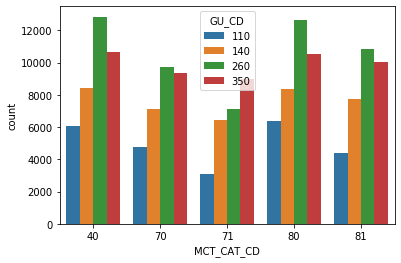

In [13]:
sns.countplot(data = df_std01_mct,x='MCT_CAT_CD',hue="GU_CD")
# 전체적인 데이터를 보았을때 대구 수성구의 소비가 가장 많다
# 전체적인 데이터를 보았을때 대구 중구의 소비가 가장 낮다 -> 인구수가 적어서 그런건가?

In [70]:
df_num = df_std01['GU_CD'].value_counts() # 인구수 대비를 나눠줘야 할 것같다
df_num[350]

87508

In [71]:
df_num = df_num.sort_values()
df_num

110    43209
140    76700
350    87508
260    89001
Name: GU_CD, dtype: int64

In [72]:
df_std01_mct_1 = df_std01_mct.pivot_table(index=['MCT_CAT_CD','GU_CD'],aggfunc='count')
df_std01_mct_1

AGE_CD  DONG_CD  SEX_CD  STD_DD  USE_AMT  USE_CNT
MCT_CAT_CD GU_CD                                                   
40         110      6051     6051    6051    6051     6051     6051
           140      8396     8396    8396    8396     8396     8396
           260     12840    12840   12840   12840    12840    12840
           350     10637    10637   10637   10637    10637    10637
70         110      4756     4756    4756    4756     4756     4756
           140      7150     7150    7150    7150     7150     7150
           260      9752     9752    9752    9752     9752     9752
           350      9348     9348    9348    9348     9348     9348
71         110      3080     3080    3080    3080     3080     3080
           140      6456     6456    6456    6456     6456     6456
           260      7116     7116    7116    7116     7116     7116
           350      9008     9008    9008    9008     9008     9008
80         110      6396     6396    6396    6396     6396     6396
           140      8394     8394    8394    8394     8394     8394
           260     12623    12623   12623   12623    12623    12623
           350     10557    10557   10557   10557    10557    10557
81         110      4405     4405    4405    4405     4405     4405
           140      7732     7732    7732    7732     7732     7732
           260     10863    10863   10863   10863    10863    10863
           350     10061    10061   10061   10061    10061    10061

In [73]:
df_std01_mct_1.index

MultiIndex([(40, 110),
            (40, 140),
            (40, 260),
            (40, 350),
            (70, 110),
            (70, 140),
            (70, 260),
            (70, 350),
            (71, 110),
            (71, 140),
            (71, 260),
            (71, 350),
            (80, 110),
            (80, 140),
            (80, 260),
            (80, 350),
            (81, 110),
            (81, 140),
            (81, 260),
            (81, 350)],
           names=['MCT_CAT_CD', 'GU_CD'])

In [74]:
sum=0
for i in range(0,5):
    for a in df_num:
        df_std01_mct_1['per'] = df_std01_mct_1['AGE_CD'] / a *100

In [75]:
df_std01_mct_1
# 전체적인 소비는 확실히 수성구가 많다

AGE_CD  DONG_CD  SEX_CD  STD_DD  USE_AMT  USE_CNT        per
MCT_CAT_CD GU_CD                                                              
40         110      6051     6051    6051    6051     6051     6051   6.798800
           140      8396     8396    8396    8396     8396     8396   9.433602
           260     12840    12840   12840   12840    12840    12840  14.426804
           350     10637    10637   10637   10637    10637    10637  11.951551
70         110      4756     4756    4756    4756     4756     4756   5.343760
           140      7150     7150    7150    7150     7150     7150   8.033618
           260      9752     9752    9752    9752     9752     9752  10.957180
           350      9348     9348    9348    9348     9348     9348  10.503253
71         110      3080     3080    3080    3080     3080     3080   3.460635
           140      6456     6456    6456    6456     6456     6456   7.253851
           260      7116     7116    7116    7116     7116     7116   7.995416
           350      9008     9008    9008    9008     9008     9008  10.121235
80         110      6396     6396    6396    6396     6396     6396   7.186436
           140      8394     8394    8394    8394     8394     8394   9.431355
           260     12623    12623   12623   12623    12623    12623  14.182987
           350     10557    10557   10557   10557    10557    10557  11.861664
81         110      4405     4405    4405    4405     4405     4405   4.949383
           140      7732     7732    7732    7732     7732     7732   8.687543
           260     10863    10863   10863   10863    10863    10863  12.205481
           350     10061    10061   10061   10061    10061    10061  11.304367

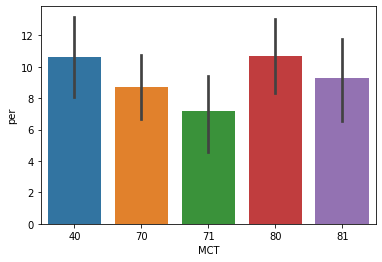

In [107]:
df_std01_mct_1['MCT']=[40,40,40,40,70,70,70,70,71,71,71,71,80,80,80,80,81,81,81,81]
sns.barplot(data=df_std01_mct_1,x='MCT',y='per')

In [84]:
df_std03 = df[df['STD_DD'].astype(str).str.startswith('201904')]
df_std03

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
635970,20190401,110,517,10,F,60,6,193
635971,20190401,110,517,10,F,65,6,442
635972,20190401,110,517,10,M,25,6,83
635973,20190401,110,517,10,M,30,6,193
635974,20190401,110,517,20,F,65,6,304
...,...,...,...,...,...,...,...,...
965439,20190430,350,720,81,M,45,5,25
965440,20190430,350,720,81,M,50,5,38
965441,20190430,350,720,81,M,55,9,122
965442,20190430,350,720,81,M,60,5,19


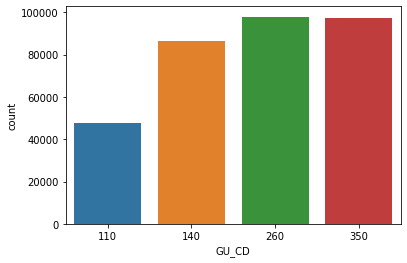

In [85]:
sns.countplot(data=df_std03,x='GU_CD')

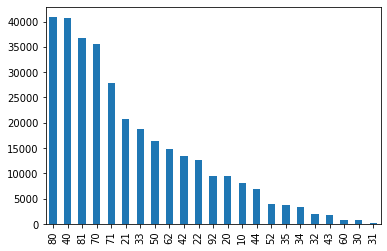

In [86]:
df_std03['MCT_CAT_CD'].nunique() 
df_std03['MCT_CAT_CD'].value_counts().plot.bar()

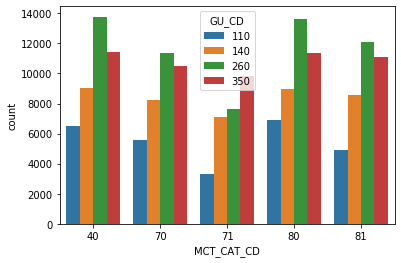

In [87]:
df_std03_mct = df_std03[df_std03['MCT_CAT_CD'].astype(str).str.contains("80|40|81|70|71")]
df_std03_mct
sns.countplot(data = df_std03_mct,x='MCT_CAT_CD',hue="GU_CD")

In [89]:
df_num = df_std03['GU_CD'].value_counts()
df_num[350]
df_num = df_num.sort_values()
df_num

110    47523
140    86616
350    97460
260    97875
Name: GU_CD, dtype: int64

In [90]:
df_std03_mct_1 = df_std03_mct.pivot_table(index=['MCT_CAT_CD','GU_CD'],aggfunc='count')
df_std03_mct_1
df_std03_mct_1.index

MultiIndex([(40, 110),
            (40, 140),
            (40, 260),
            (40, 350),
            (70, 110),
            (70, 140),
            (70, 260),
            (70, 350),
            (71, 110),
            (71, 140),
            (71, 260),
            (71, 350),
            (80, 110),
            (80, 140),
            (80, 260),
            (80, 350),
            (81, 110),
            (81, 140),
            (81, 260),
            (81, 350)],
           names=['MCT_CAT_CD', 'GU_CD'])

In [91]:
sum=0
for i in range(0,5):
    for a in df_num:
        df_std03_mct_1['per'] = df_std03_mct_1['AGE_CD'] / a *100
df_std03_mct_1

AGE_CD  DONG_CD  SEX_CD  STD_DD  USE_AMT  USE_CNT        per
MCT_CAT_CD GU_CD                                                              
40         110      6512     6512    6512    6512     6512     6512   6.653384
           140      9000     9000    9000    9000     9000     9000   9.195402
           260     13765    13765   13765   13765    13765    13765  14.063857
           350     11400    11400   11400   11400    11400    11400  11.647510
70         110      5560     5560    5560    5560     5560     5560   5.680715
           140      8241     8241    8241    8241     8241     8241   8.419923
           260     11356    11356   11356   11356    11356    11356  11.602554
           350     10465    10465   10465   10465    10465    10465  10.692209
71         110      3308     3308    3308    3308     3308     3308   3.379821
           140      7080     7080    7080    7080     7080     7080   7.233716
           260      7664     7664    7664    7664     7664     7664   7.830396
           350      9809     9809    9809    9809     9809     9809  10.021967
80         110      6917     6917    6917    6917     6917     6917   7.067178
           140      8998     8998    8998    8998     8998     8998   9.193359
           260     13629    13629   13629   13629    13629    13629  13.924904
           350     11359    11359   11359   11359    11359    11359  11.605619
81         110      4906     4906    4906    4906     4906     4906   5.012516
           140      8596     8596    8596    8596     8596     8596   8.782631
           260     12107    12107   12107   12107    12107    12107  12.369860
           350     11071    11071   11071   11071    11071    11071  11.311367

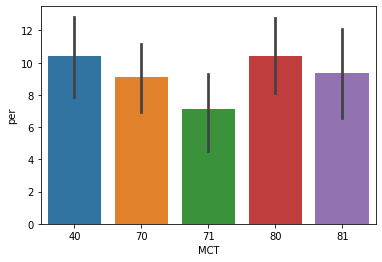

In [108]:
df_std03_mct_1['MCT']=[40,40,40,40,70,70,70,70,71,71,71,71,80,80,80,80,81,81,81,81]
sns.barplot(data=df_std03_mct_1,x='MCT',y='per')

In [64]:
df_std05 = df[df['STD_DD'].astype(str).str.startswith('202002')]
df_std05

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
1310606,20200201,110,517,10,F,25,5,79
1310607,20200201,110,517,10,M,20,16,1054
1310608,20200201,110,517,10,M,25,11,269
1310609,20200201,110,517,10,M,30,11,448
1310610,20200201,110,517,10,M,45,5,343
...,...,...,...,...,...,...,...,...
1604241,20200229,350,720,81,M,45,18,171
1604242,20200229,350,720,81,M,50,22,401
1604243,20200229,350,720,81,M,55,4,91
1604244,20200229,350,720,92,F,30,4,44


In [65]:
df_std05['MCT_CAT_CD'].nunique()

23

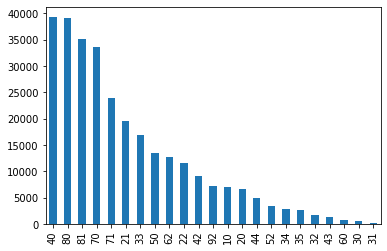

In [67]:
df_std05['MCT_CAT_CD'].value_counts().plot.bar()
# 40이 제일 크다 -> 근데 전체적인 소비가 늘었던것같다
# 의료기관의 수가 많이 증가했다

In [68]:
df_std05_mct = df_std05[df_std05['MCT_CAT_CD'].astype(str).str.contains("80|40|81|70|71")]
df_std05_mct

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
1310638,20200201,110,517,40,F,20,42,294
1310639,20200201,110,517,40,F,25,95,909
1310640,20200201,110,517,40,F,30,53,324
1310641,20200201,110,517,40,F,35,53,403
1310642,20200201,110,517,40,F,40,32,272
...,...,...,...,...,...,...,...,...
1604239,20200229,350,720,81,M,35,22,170
1604240,20200229,350,720,81,M,40,13,306
1604241,20200229,350,720,81,M,45,18,171
1604242,20200229,350,720,81,M,50,22,401


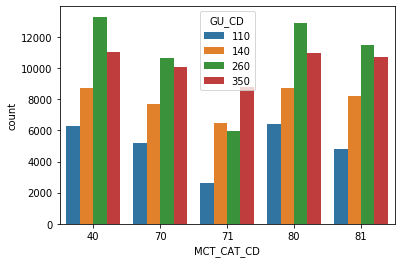

In [69]:
sns.countplot(data = df_std05_mct,x='MCT_CAT_CD',hue="GU_CD")
# 71 수가 확연하게 줄었다

In [76]:
df_num = df_std05['GU_CD'].value_counts() # 인구수 대비를 나눠줘야 할 것같다
df_num[350]

88845

In [77]:
df_num = df_num.sort_values()
df_num

110    41359
140    78334
260    85102
350    88845
Name: GU_CD, dtype: int64

In [78]:
df_std05_mct_1 = df_std05_mct.pivot_table(index=['MCT_CAT_CD','GU_CD'],aggfunc='count')
df_std05_mct_1

AGE_CD  DONG_CD  SEX_CD  STD_DD  USE_AMT  USE_CNT
MCT_CAT_CD GU_CD                                                   
40         110      6282     6282    6282    6282     6282     6282
           140      8699     8699    8699    8699     8699     8699
           260     13299    13299   13299   13299    13299    13299
           350     11020    11020   11020   11020    11020    11020
70         110      5188     5188    5188    5188     5188     5188
           140      7727     7727    7727    7727     7727     7727
           260     10685    10685   10685   10685    10685    10685
           350     10050    10050   10050   10050    10050    10050
71         110      2635     2635    2635    2635     2635     2635
           140      6477     6477    6477    6477     6477     6477
           260      5962     5962    5962    5962     5962     5962
           350      8774     8774    8774    8774     8774     8774
80         110      6418     6418    6418    6418     6418     6418
           140      8699     8699    8699    8699     8699     8699
           260     12928    12928   12928   12928    12928    12928
           350     10979    10979   10979   10979    10979    10979
81         110      4823     4823    4823    4823     4823     4823
           140      8190     8190    8190    8190     8190     8190
           260     11485    11485   11485   11485    11485    11485
           350     10694    10694   10694   10694    10694    10694

In [80]:
df_std05_mct_1.index

MultiIndex([(40, 110),
            (40, 140),
            (40, 260),
            (40, 350),
            (70, 110),
            (70, 140),
            (70, 260),
            (70, 350),
            (71, 110),
            (71, 140),
            (71, 260),
            (71, 350),
            (80, 110),
            (80, 140),
            (80, 260),
            (80, 350),
            (81, 110),
            (81, 140),
            (81, 260),
            (81, 350)],
           names=['MCT_CAT_CD', 'GU_CD'])

In [79]:
sum=0
for i in range(0,5):
    for a in df_num:
        df_std05_mct_1['per'] = df_std05_mct_1['AGE_CD'] / a *100

In [82]:
df_std05_mct_1
# 확실하게 70 의료관련해서는 증가한 게 눈에 보임
# 71은 확연하게 감소함
# 전체적인 소비가 증가할 뿐만 아니라 80 81 이 증가함

AGE_CD  DONG_CD  SEX_CD  STD_DD  USE_AMT  USE_CNT        per
MCT_CAT_CD GU_CD                                                              
40         110      6282     6282    6282    6282     6282     6282   7.070741
           140      8699     8699    8699    8699     8699     8699   9.791209
           260     13299    13299   13299   13299    13299    13299  14.968766
           350     11020    11020   11020   11020    11020    11020  12.403624
70         110      5188     5188    5188    5188     5188     5188   5.839383
           140      7727     7727    7727    7727     7727     7727   8.697169
           260     10685    10685   10685   10685    10685    10685  12.026563
           350     10050    10050   10050   10050    10050    10050  11.311835
71         110      2635     2635    2635    2635     2635     2635   2.965839
           140      6477     6477    6477    6477     6477     6477   7.290225
           260      5962     5962    5962    5962     5962     5962   6.710563
           350      8774     8774    8774    8774     8774     8774   9.875626
80         110      6418     6418    6418    6418     6418     6418   7.223817
           140      8699     8699    8699    8699     8699     8699   9.791209
           260     12928    12928   12928   12928    12928    12928  14.551185
           350     10979    10979   10979   10979    10979    10979  12.357477
81         110      4823     4823    4823    4823     4823     4823   5.428555
           140      8190     8190    8190    8190     8190     8190   9.218302
           260     11485    11485   11485   11485    11485    11485  12.927008
           350     10694    10694   10694   10694    10694    10694  12.036693

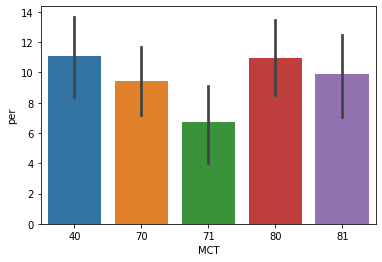

In [106]:
df_std05_mct_1['MCT']=[40,40,40,40,70,70,70,70,71,71,71,71,80,80,80,80,81,81,81,81]
#df_std05_mct_1
sns.barplot(data=df_std05_mct_1,x='MCT',y='per')